# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.7).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following add

### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google"

BasicAnalysis.ipynb	  FLUTEMI.WAV
BasicPyROOTExample.ipynb  HistogrammingInROOT.ipynb
Chi2Fitting.ipynb	  MCSimpleIntegrator.ipynb
Data5.root		  monje-a-lo-bonzo-blanco-y-negro.png
DatosParcial2		  piano-C5.wav
DatosProyectoMontecarlo   root_build_google_yikes.tar
DatosResonancia.root	  TrimmedTree.root
FFT_imagen.ipynb	  TTreeExcercise.ipynb
FFT.ipynb


In [4]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [5]:
!ls -ltrh root_build/

total 2.6M
-rw-r--r--  1 root root   70 Sep 20  2018 recmake_replay.sh
-rw-r--r--  1 root root   70 Sep 20  2018 recmake_initial.sh
drwxr-xr-x  4 root root 4.0K Sep 20  2018 PCRE-prefix
drwxr-xr-x  4 root root 4.0K Sep 20  2018 LZMA-prefix
drwxr-xr-x  5 root root 4.0K Sep 20  2018 builtins
drwxr-xr-x  4 root root 4.0K Sep 20  2018 AFTERIMAGE-prefix
drwxr-xr-x  4 root root 4.0K Sep 20  2018 VDT-prefix
drwxr-xr-x  4 root root 4.0K Sep 20  2018 TBB-prefix
-rw-rw-r--  1 root root  718 Sep 20  2018 ROOTUseFile.cmake
-rw-rw-r--  1 root root  597 Sep 20  2018 ROOTConfig-version.cmake
-rw-rw-r--  1 root root 6.3K Sep 20  2018 ROOTConfig.cmake
drwxr-xr-x  2 root root 4.0K Sep 20  2018 config
-rw-rw-r--  1 root root  55K Sep 20  2018 root-help.el
-rw-rw-r--  1 root root 2.1K Sep 20  2018 README.txt
-rw-rw-r--  1 root root  847 Sep 20  2018 LICENSE.txt
-rw-rw-r--  1 root root  24K Sep 20  2018 LGPL2_1.txt
drwxr-xr-x  2 root root 4.0K Sep 20  2018 installtree
-rw-rw-r--  1 root root 1.6K Sep 20  2


### 3. Modify the PATH in order to tell python where to look for pyROOT


In [6]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
#importo paqueterias
import ROOT 
import numpy as np
from random import random 
from scipy import integrate
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.14/04


# We made it!!! :)

In [8]:
DataChain_C=ROOT.TChain("SystemTree") #leer los datos que se encuentra en el drive 
DataChain_L=ROOT.TChain("SystemTree") #leer los datos que se encuentra en el drive 
DataChain_C.Add("/content/drive/My Drive/CarlosAndresBetancur.root") #datos Carlos Betancur.ROOT
DataChain_L.Add("/content/drive/My Drive/LucasHernanQuiceno.root") #datos Lucas Quiceno.ROOT


1

In [9]:
NumberOfEventsToCheck_C=DataChain_C.GetEntries() #verificar cuantos datsose va a analizar
NumberOfEventsToCheck_L=DataChain_L.GetEntries() #verificar cuantos datsose va a analzar
print("Analizaremos ",NumberOfEventsToCheck_C, " eventos en los datos de Carlos")
print("Analizaremos ",NumberOfEventsToCheck_L, " eventos en los datos de Lucas")

Analizaremos  80000  eventos en los datos de Carlos
Analizaremos  85000  eventos en los datos de Lucas


Primero se realiza un histograma de la variable x que corresponde a los eventos generados

<ROOT.TH1F object ("Hist") at 0x78c7c00>
<ROOT.TH1F object ("Hist") at 0x78bb000>


Warning in <TROOT::Append>: Replacing existing TH1: Hist (Potential memory leak).


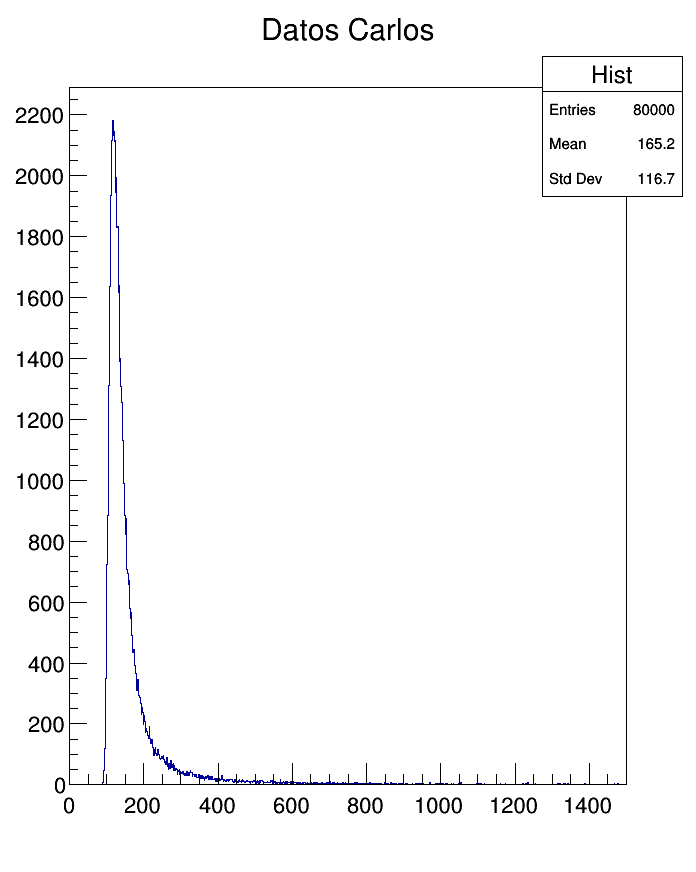

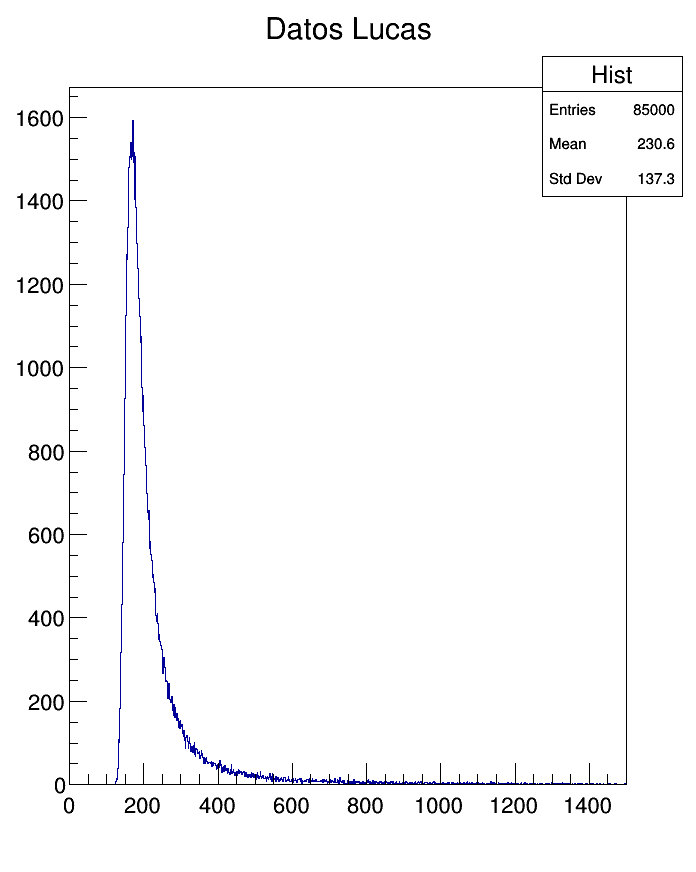

In [10]:
Histograma_C = ROOT.TH1F( 'Hist', 'Datos Carlos', 1000, 0 , 1500 ) #crear histograma
Histograma_L = ROOT.TH1F( 'Hist', 'Datos Lucas', 1000, 0 , 1500 ) #crear histograma

for entry in DataChain_C:
  var_C=entry.x
  Histograma_C.Fill(var_C)

for entry in DataChain_L:
  var_L=entry.x
  Histograma_L.Fill(var_L)

c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
Histograma_C.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()
print(Histograma_C)

c2 = ROOT.TCanvas( 'c2', 'The FillRandom example', 200, 10, 700, 900 )
c2.SetFillColor( 0 )
Histograma_L.Draw()
c2.Update()
ROOT.gROOT.GetListOfCanvases().Draw()
print(Histograma_L)


In [11]:
#Algoritmo de Metrópolis para el cual usamos ROOT.Math.Landau 
N_C=80000 #LONGITUD DATOS DE CARLOS
N_L=85000 #LONGITUD DATOS DE LUCAS
Cphi_l1=[] ; Cphi_l2=[] # LISTA PARA GUARDAR LOS ESTADOS DE CARLOS
Lphi_l1=[] ; Lphi_l2=[] # LISTA PARA GUARDAR LOS ESTADOS DE LUCAS
Ca=80 ; Cb=1500  # VALORES ENTRE LOS QUE ESTA EL HISTOGRAMA DE CARLOS
La=100 ; Lb=1500  # VALORES ENTRE LOS QUE ESTA EL HISTOGRAMA DE LUCAS

Cphi_01=(Cb-Ca)*random()+Ca ; Cphi_02=(Cb-Ca)*random()+Ca # GENERO EL ESTADO INICIAL PARA CARLOS
Lphi_01=(Lb-La)*random()+La ; Lphi_02=(Lb-La)*random()+La # GENERO EL ESTADO INICIAL PARA LUCAS
Cphi_l1.append(Cphi_01) ; Cphi_l2.append(Cphi_02) # AGREGO EL ESTADO INICIAL PARA CARLOS
Lphi_l1.append(Lphi_01) ; Lphi_l2.append(Lphi_02) # AGREGO EL ESTADO INICIAL PARA LUCAS
CMu=165.2 ;Ccu=116.7 # MEDIA Y VARIANZA DE LOS DATOS DE CARLOS 
LMu=230.6 ;Lcu=137.3 # MEDIA Y VARIANZA DE LOS DATOS DE LUCAS

In [12]:
# GENERAMOS LOS ESTADOS ALEATORIOS PRIMADOS (ALGORITMO DE METROPOLIS) PARA LOS DATOS DE CARLOS
while ((len(Cphi_l1)+len(Cphi_l2))<N_C):

    Cphi_p1=(Cb-Ca)*random()+Ca # ESTADO PRIMADO -> PASO 2 METROPOLIS
    Cdelta_S1=-np.log(ROOT.TMath.Landau(Cphi_p1,CMu,Ccu,True)/ROOT.TMath.Landau(Cphi_l1[-1],CMu,Ccu,True)) # CALCULA EL DELTA -> PASO 3 DE METROPOLIS

    Cphi_p2=(Cb-Ca)*random()+Ca # ESTADO PRIMADO -> PASO 2 METROPOLIS
    Cdelta_S2=-np.log(ROOT.TMath.Landau(Cphi_p2,CMu,Ccu,True)/ROOT.TMath.Landau(Cphi_l2[-1],CMu,Ccu,True)) # CALCULA EL DELTA -> PASO 3 DE METROPOLIS

    if Cdelta_S1<0 and Cdelta_S2<0: # CONDICIONAL CASO 1
      Cphi_i1=Cphi_p1 # SI SE CUMPLE ENTONCES PHI1=PHI_PRIMADO PASO 4 DE METROPOLIS
      Cphi_l1.append(Cphi_i1) # LO AGREGAMOS
      if ((len(Cphi_l1)+len(Cphi_l2))>=N_C): # NO SE DEBEN SUPERAR LOS 80MIL
          break # SI LO HACE ROMPA EL BUCLE
      Cphi_i2=Cphi_p2 # SI NO HEMOS CONSEGUIDO LOS 80MIL ENTONCES PHI1=PHI_PRIMADO
      Cphi_l2.append(Cphi_i2) # LO AGREGAMOS

    if Cdelta_S1<0 and Cdelta_S2>0: # CONDICIONAL CASO 2
      Cphi_i1=Cphi_p1 
      Cphi_l1.append(Cphi_i1) 
      if ((len(Cphi_l1)+len(Cphi_l2))>=N_C): 
          break 
      Cr=random() # COMO DELTA2 > 0 ENTONCES GENERE UN NUMERO ALEATORIO PASO 5 DE METROPOLIS
      CFRAC=ROOT.TMath.Landau(Cphi_p2,CMu,Ccu,True)/ROOT.TMath.Landau(Cphi_l2[-1],CMu,Ccu,True) # CALCULAMOS ESTE COCIENTE
      if Cr<CFRAC:     # SI EL NUMERO ALEATORIO QUE GENERAMOS ES MENOR QUE EL COCIENTE ENTONCES
        Cphi_i2=Cphi_p2 # AGREGUE EL ESTADO
        Cphi_l2.append(Cphi_i2) # YA

# IGUAL DE AQUI PARA ABAJO

    if Cdelta_S1>0 and Cdelta_S2<0: # CONDICIONAL CASO 3
      Cphi_i2=Cphi_p2
      Cphi_l2.append(Cphi_i2)
      if ((len(Cphi_l1)+len(Cphi_l2))>=N_C):
          break
      Cr=random()
      CFRAC=ROOT.TMath.Landau(Cphi_p1,CMu,Ccu,True)/ROOT.TMath.Landau(Cphi_l1[-1],CMu,Ccu,True)
      if Cr<CFRAC:
        Cphi_i1=Cphi_p1
        Cphi_l1.append(Cphi_i1)
        
    if Cdelta_S1>0 and Cdelta_S2>0: # CONDICIONAL CASO 4
      Cr=random() ; Cro=random()
      CFRAC=ROOT.TMath.Landau(Cphi_p1,CMu,Ccu,True)/ROOT.TMath.Landau(Cphi_l1[-1],CMu,Ccu,True)
      CFRACo=ROOT.TMath.Landau(Cphi_p2,CMu,Ccu,True)/ROOT.TMath.Landau(Cphi_l2[-1],CMu,Ccu,True)

      if Cro<CFRACo:
        Cphi_i2=Cphi_p2
        Cphi_l2.append(Cphi_i2)
        if ((len(Cphi_l1)+len(Cphi_l2))>=N_C):
          break
      if Cr<CFRAC:
        Cphi_i1=Cphi_p1
        Cphi_l1.append(Cphi_i1)







# GENERAMOS LOS ESTADOS ALEATORIOS PRIMADOS (ALGORITMO DE METROPOLIS) PARA LOS DATOS DE LUCAS
while ((len(Lphi_l1)+len(Lphi_l2))<N_L):

    Lphi_p1=(Lb-La)*random()+La # ESTADO PRIMADO -> PASO 2 METROPOLIS
    Ldelta_S1=-np.log(ROOT.TMath.Landau(Lphi_p1,LMu,Lcu,True)/ROOT.TMath.Landau(Lphi_l1[-1],LMu,Lcu,True)) # CALCULA EL DELTA -> PASO 3 DE METROPOLIS

    Lphi_p2=(Lb-La)*random()+La # ESTADO PRIMADO -> PASO 2 METROPOLIS
    Ldelta_S2=-np.log(ROOT.TMath.Landau(Lphi_p2,LMu,Lcu,True)/ROOT.TMath.Landau(Lphi_l2[-1],LMu,Lcu,True)) # CALCULA EL DELTA -> PASO 3 DE METROPOLIS

    if Ldelta_S1<0 and Ldelta_S2<0: # CONDICIONAL CASO 1
      Lphi_i1=Lphi_p1 # SI SE CUMPLE ENTONCES PHI1=PHI_PRIMADO PASO 4 DE METROPOLIS
      Lphi_l1.append(Lphi_i1) # LO AGREGAMOS
      if ((len(Lphi_l1)+len(Lphi_l2))>=N_L): # NO SE DEBEN SUPERAR LOS 85MIL
          break # SI LO HACE ROMPA EL BUCLE
      Lphi_i2=Lphi_p2 # SI NO HEMOS CONSEGUIDO LOS 85MIL ENTONCES PHI1=PHI_PRIMADO
      Lphi_l2.append(Lphi_i2) # LO AGREGAMOS

    if Ldelta_S1<0 and Ldelta_S2>0: # CONDICIONAL CASO 2
      Lphi_i1=Lphi_p1 
      Lphi_l1.append(Lphi_i1) 
      if ((len(Lphi_l1)+len(Lphi_l2))>=N_L): 
          break 
      Lr=random() # COMO DELTA2 > 0 ENTONCES GENERE UN NUMERO ALEATORIO PASO 5 DE METROPOLIS
      LFRAC=ROOT.TMath.Landau(Lphi_p2,LMu,Lcu,True)/ROOT.TMath.Landau(Lphi_l2[-1],LMu,Lcu,True) # CALCULAMOS ESTE COCIENTE
      if Lr<LFRAC:     # SI EL NUMERO ALEATORIO QUE GENERAMOS ES MENOR QUE EL COCIENTE ENTONCES
        Lphi_i2=Lphi_p2 # AGREGUE EL ESTADO
        Lphi_l2.append(Lphi_i2) # YA

# IGUAL DE AQUI PARA ABAJO

    if Ldelta_S1>0 and Ldelta_S2<0: # CONDICIONAL CASO 3
      Lphi_i2=Lphi_p2
      Lphi_l2.append(Lphi_i2)
      if ((len(Lphi_l1)+len(Lphi_l2))>=N_L):
          break
      Lr=random()
      LFRAC=ROOT.TMath.Landau(Lphi_p1,LMu,Lcu,True)/ROOT.TMath.Landau(Lphi_l1[-1],LMu,Lcu,True)
      if Lr<LFRAC:
        Lphi_i1=Lphi_p1
        Lphi_l1.append(Lphi_i1)
        
    if Ldelta_S1>0 and Ldelta_S2>0: # CONDICIONAL CASO 4
      Lr=random() ; Lro=random()
      LFRAC=ROOT.TMath.Landau(Lphi_p1,LMu,Lcu,True)/ROOT.TMath.Landau(Lphi_l1[-1],LMu,Lcu,True)
      LFRACo=ROOT.TMath.Landau(Lphi_p2,LMu,Lcu,True)/ROOT.TMath.Landau(Lphi_l2[-1],LMu,Lcu,True)

      if Lro<LFRACo:
        Lphi_i2=Lphi_p2
        Lphi_l2.append(Lphi_i2)
        if ((len(Lphi_l1)+len(Lphi_l2))>=N_L):
          break
      if Lr<LFRAC:
        Lphi_i1=Lphi_p1
        Lphi_l1.append(Lphi_i1)

80000
85000


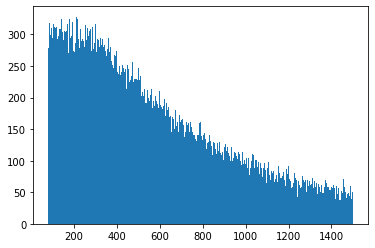

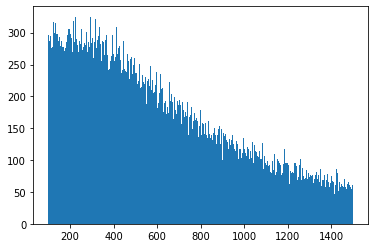

Warning in <TROOT::Append>: Replacing existing TH1: HistC (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: CARLOS
Warning in <TROOT::Append>: Replacing existing TH1: HistL (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: LUCAS


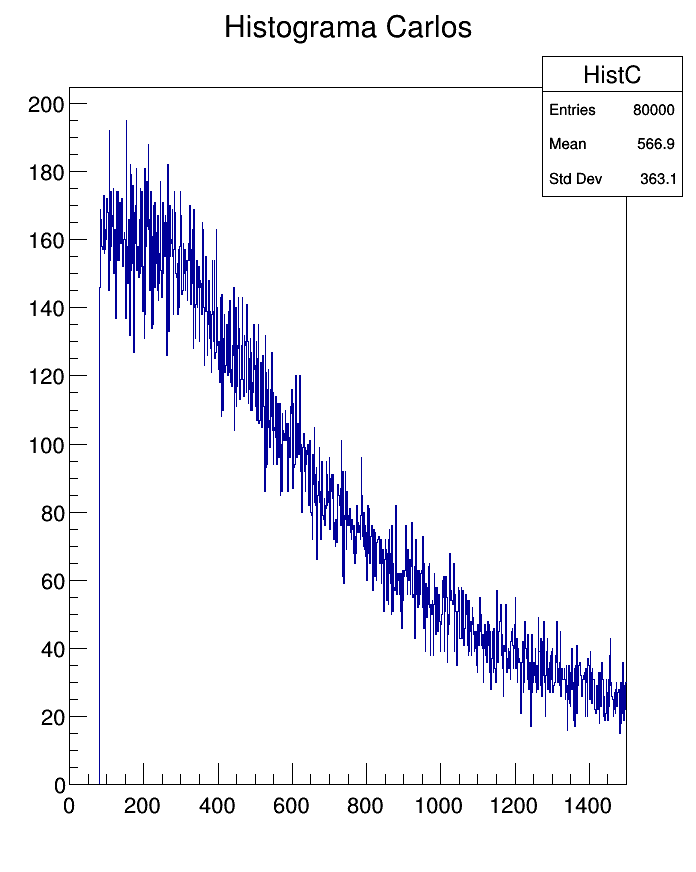

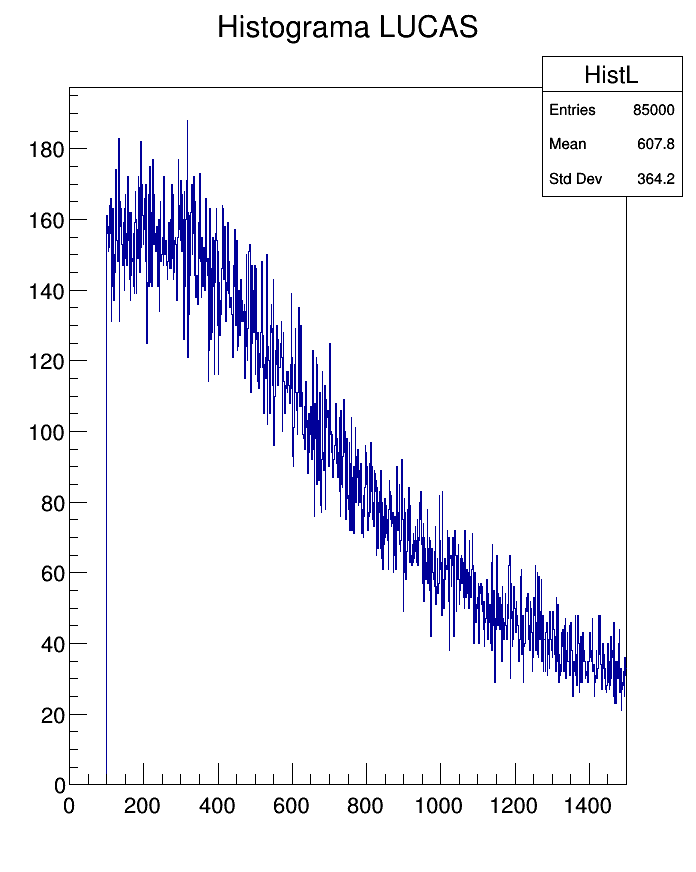

In [14]:
#Histograma generado es:
print(len(Cphi_l1)+len(Cphi_l2)) # VERIFICAMOS QUE ESTEN LOS 80MIL ESTADOS DE CARLOS
print(len(Lphi_l1)+len(Lphi_l2)) # VERIFICAMOS QUE ESTEN LOS 85MIL ESTADOS DE LUCAS

Cphi=Cphi_l1+Cphi_l2 # SUMAMOS LOS ESTADOS DE CARLOS 
Lphi=Lphi_l1+Lphi_l2 # SUMAMOS LOS ESTADOS DE LUCAS

plt.hist(Cphi,bins=500) # GRAFICAMOS EL HISTOGRAMA DE CARLOS
plt.show()
HistC= ROOT.TH1F( 'HistC', 'Histograma Carlos', 1000, 0 , 1500 )
for i in Cphi:
  HistC.Fill(i)
c1 = ROOT.TCanvas( 'CARLOS', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
HistC.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

plt.hist(Lphi,bins=500) # GRAFICAMOS EL HISTOGRAMA DE LUCAS
plt.show()
HistL= ROOT.TH1F( 'HistL', 'Histograma LUCAS', 1000, 0 , 1500 )
for i in Lphi:
  HistL.Fill(i)
c2 = ROOT.TCanvas( 'LUCAS', 'The FillRandom example', 200, 10, 700, 900 )
c2.SetFillColor( 0 )
HistL.Draw()
c2.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

In [30]:
#Vamos a buscar los mejores valores de mu y c
#Generemos primero diferentes valores de mu y c
# N=80000 
CALLX=[] ; CALLY=[] #En este veré los valores de MU y C PARA CARLOS
LALLX=[] ; LALLY=[] #En este veré los valores de MU y C PARA LUCAS
# a=80 ; b=1500

CMU=np.linspace(150,180,6) # INTERVALO
CC=np.linspace(140,180,6) # INTERVALO
print("Carlos mu",CMU)
print("Carlos c",CC)
LMU=np.linspace(200,230,6) # INTERVALO
LC=np.linspace(140,180,6) # INTERVALO
print("Lucas mu",LMU)
print("Lucas c",LC)

Carlos mu [150. 156. 162. 168. 174. 180.]
Carlos c [140. 148. 156. 164. 172. 180.]
Lucas mu [200. 206. 212. 218. 224. 230.]
Lucas c [140. 148. 156. 164. 172. 180.]


In [31]:
#Aplicamos ahora metrópolis pero variando el mu y c PARA CARLOS

for j in CMU:
  for k in CC:
    Cphi_l1=[]
    Cphi_l2=[]
    Cphi_01=(Cb-Ca)*random()+Ca
    Cphi_02=(Cb-Ca)*random()+Ca
    Cphi_l1.append(Cphi_01)
    Cphi_l2.append(Cphi_02)
    while ((len(Cphi_l1)+len(Cphi_l2))<N_C):
      Cphi_p1=(Cb-Ca)*random()+Ca
      Cdelta_S1=-np.log(ROOT.TMath.Landau(Cphi_p1,j,k,True)/ROOT.TMath.Landau(Cphi_l1[-1],j,k,True))

      Cphi_p2=(Cb-Ca)*random()+Ca
      Cdelta_S2=-np.log(ROOT.TMath.Landau(Cphi_p2,j,k,True)/ROOT.TMath.Landau(Cphi_l2[-1],j,k,True))

      if Cdelta_S1<0 and Cdelta_S2<0:
        Cphi_i1=Cphi_p1
        Cphi_l1.append(Cphi_i1)
        if ((len(Cphi_l1)+len(Cphi_l2))>=N_C):
          break
        Cphi_i2=Cphi_p2
        Cphi_l2.append(Cphi_i2)
      if Cdelta_S1<0 and Cdelta_S2>0:
        Cphi_i1=Cphi_p1
        Cphi_l1.append(Cphi_i1)
        if ((len(Cphi_l1)+len(Cphi_l2))>=N_C):
          break
        Cr=random()
        CFRAC=ROOT.TMath.Landau(Cphi_p2,j,k,True)/ROOT.TMath.Landau(Cphi_l2[-1],j,k,True)
        if Cr<CFRAC:
          Cphi_i2=Cphi_p2
          Cphi_l2.append(Cphi_i2)
      if Cdelta_S1>0 and Cdelta_S2<0:
        Cphi_i2=Cphi_p2
        Cphi_l2.append(Cphi_i2)
        if ((len(Cphi_l1)+len(Cphi_l2))>=N_C):
          break
        Cr=random()
        CFRAC=ROOT.TMath.Landau(Cphi_p1,j,k,True)/ROOT.TMath.Landau(Cphi_l1[-1],j,k,True)
        if Cr<CFRAC:
          Cphi_i1=Cphi_p1
          Cphi_l1.append(Cphi_i1)
      if Cdelta_S1>0 and Cdelta_S2>0:
        Cr=random()
        CFRAC=ROOT.TMath.Landau(Cphi_p1,j,k,True)/ROOT.TMath.Landau(Cphi_l1[-1],j,k,True)
        Cro=random()
        CFRACo=ROOT.TMath.Landau(Cphi_p2,j,k,True)/ROOT.TMath.Landau(Cphi_l2[-1],j,k,True)
        if Cro<CFRACo:
          Cphi_i2=Cphi_p2
          Cphi_l2.append(Cphi_i2)
          if ((len(Cphi_l1)+len(Cphi_l2))>=N_C):
            break
        if Cr<CFRAC:
          Cphi_i1=Cphi_p1
          Cphi_l1.append(Cphi_i1)
    Cphi=Cphi_l1+Cphi_l2

    CALLX.append(Cphi)
    CALLY.append([j,k])


#Aplicamos ahora metrópolis pero variando el mu y c PARA LUCAS

for l in LMU:
  for m in LC:
    Lphi_l1=[]
    Lphi_l2=[]
    Lphi_01=(Lb-La)*random()+La
    Lphi_02=(Lb-La)*random()+La
    Lphi_l1.append(Lphi_01)
    Lphi_l2.append(Lphi_02)
    while ((len(Lphi_l1)+len(Lphi_l2))<N_L):
      Lphi_p1=(Lb-La)*random()+La
      Ldelta_S1=-np.log(ROOT.TMath.Landau(Lphi_p1,l,m,True)/ROOT.TMath.Landau(Lphi_l1[-1],l,m,True))

      Lphi_p2=(Lb-La)*random()+La
      Ldelta_S2=-np.log(ROOT.TMath.Landau(Lphi_p2,l,m,True)/ROOT.TMath.Landau(Lphi_l2[-1],l,m,True))

      if Ldelta_S1<0 and Ldelta_S2<0:
        Lphi_i1=Lphi_p1
        Lphi_l1.append(Lphi_i1)
        if ((len(Lphi_l1)+len(Lphi_l2))>=N_L):
          break
        Lphi_i2=Lphi_p2
        Lphi_l2.append(Lphi_i2)
      if Ldelta_S1<0 and Ldelta_S2>0:
        Lphi_i1=Lphi_p1
        Lphi_l1.append(Lphi_i1)
        if ((len(Lphi_l1)+len(Lphi_l2))>=N_L):
          break
        Lr=random()
        LFRAC=ROOT.TMath.Landau(Lphi_p2,l,m,True)/ROOT.TMath.Landau(Lphi_l2[-1],l,m,True)
        if Lr<LFRAC:
          Lphi_i2=Lphi_p2
          Lphi_l2.append(Lphi_i2)
      if Ldelta_S1>0 and Ldelta_S2<0:
        Lphi_i2=Lphi_p2
        Lphi_l2.append(Lphi_i2)
        if ((len(Lphi_l1)+len(Lphi_l2))>=N_L):
          break
        Lr=random()
        LFRAC=ROOT.TMath.Landau(Lphi_p1,l,m,True)/ROOT.TMath.Landau(Lphi_l1[-1],l,m,True)
        if Lr<LFRAC:
          Lphi_i1=Lphi_p1
          Lphi_l1.append(Lphi_i1)
      if Ldelta_S1>0 and Ldelta_S2>0:
        Lr=random()
        LFRAC=ROOT.TMath.Landau(Lphi_p1,l,m,True)/ROOT.TMath.Landau(Lphi_l1[-1],l,m,True)
        Lro=random()
        LFRACo=ROOT.TMath.Landau(Lphi_p2,l,m,True)/ROOT.TMath.Landau(Lphi_l2[-1],l,m,True)
        if Lro<LFRACo:
          Lphi_i2=Lphi_p2
          Lphi_l2.append(Lphi_i2)
          if ((len(Lphi_l1)+len(Lphi_l2))>=N_L):
            break
        if Lr<LFRAC:
          Lphi_i1=Lphi_p1
          Lphi_l1.append(Lphi_i1)
    Lphi=Lphi_l1+Lphi_l2

    LALLX.append(Lphi)
    LALLY.append([l,m])
        

In [32]:
#Para el chi-cuadrado: CARLOS
CBin=Histograma_C.GetNbinsX()+1
CFullChi2 = []
for l in range(len(CALLX)):
  Cchi2=0.0 
  for z in range(CBin): 
    if Histograma_C.GetBinContent(z)!=0: #evitar division por cero
      Cchi2+=((Histograma_C.GetBinContent(z)-CALLX[l][z])**2)/Histograma_C.GetBinContent(z) #chi^2=sum[(dato(i)-metropolis(i))^2/dato(i)] 
  Cchi2ndf=Cchi2/CBin 
  CFullChi2.append(Cchi2ndf)
print(CFullChi2)
print(len(CFullChi2))

#Para el chi-cuadrado: LUCAS
LBin=Histograma_L.GetNbinsX()+1
LFullChi2 = []
for l in range(len(LALLX)):
  Lchi2=0.0 
  for z in range(LBin): 
    if Histograma_L.GetBinContent(z)!=0: #evitar division por cero
      Lchi2+=((Histograma_L.GetBinContent(z)-LALLX[l][z])**2)/Histograma_L.GetBinContent(z) #chi^2=sum[(dato(i)-metropolis(i))^2/dato(i)] 
  Lchi2ndf=Lchi2/LBin 
  LFullChi2.append(Lchi2ndf)
print(LFullChi2)
print(len(LFullChi2))

[109733.49686525733, 128034.46906866763, 132463.90685350582, 149626.41777141308, 138017.0483325079, 152610.69353096385, 132119.22619503236, 127032.63078581665, 141024.5982276345, 142197.51835892643, 153109.09125181113, 152712.206382635, 133094.7762733887, 138730.4056699094, 127000.33558533323, 133640.57173804514, 152916.40992992744, 138086.68449385354, 143895.34342287437, 143524.82167995174, 153527.28115106642, 142745.62411777562, 137016.896849488, 139232.29234526568, 134677.19943069358, 151750.84188629276, 151210.7912202444, 157002.4461121702, 132608.14149115092, 146140.6594192197, 148628.23240404032, 139274.9581446168, 154665.61912962934, 149883.4197293198, 159283.00282796667, 148217.5128148244]
36
[97342.41783644882, 128839.30646343184, 115199.9074724186, 125320.59001687687, 122354.84055448661, 134711.73468106377, 104581.5178960058, 115349.27251702102, 116143.7735768628, 102932.7167422199, 118028.71447503497, 133931.02251638728, 104246.36939727032, 116462.86795655536, 103501.5104656

In [33]:
# buscamos el valor minimo de Chi2 y asi saber la posición mu y c corresponde. Ademas se divide por 1000 que es el número de bines
Cmini=min(CFullChi2)
Cpos=CFullChi2.index(Cmini)
print("minimo de chi^2 CARLOS:",Cmini/1000)
print("posicion CARLOS",Cpos) 

# buscamos el valor minimo de Chi2 y asi saber la posición mu y c corresponde. Ademas se divide por 1000 que es el número de bines
Lmini=min(LFullChi2)
Lpos=LFullChi2.index(Lmini)
print("minimo de chi^2 LUCAS:",Lmini/1000)
print("posicion LUCAS",Lpos) 

minimo de chi^2 CARLOS: 109.73349686525734
posicion CARLOS 0
minimo de chi^2 LUCAS: 97.34241783644882
posicion LUCAS 0


39934
40066
80000


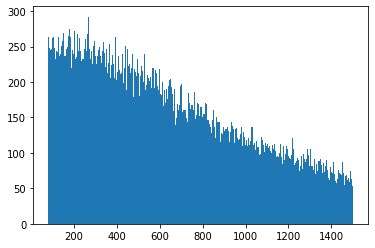

42560
42440
85000


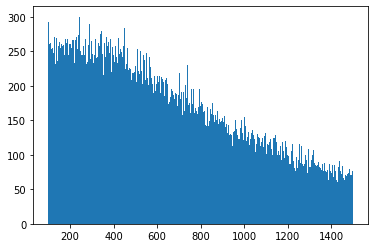

Warning in <TROOT::Append>: Replacing existing TH1: HistC (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: HistL (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


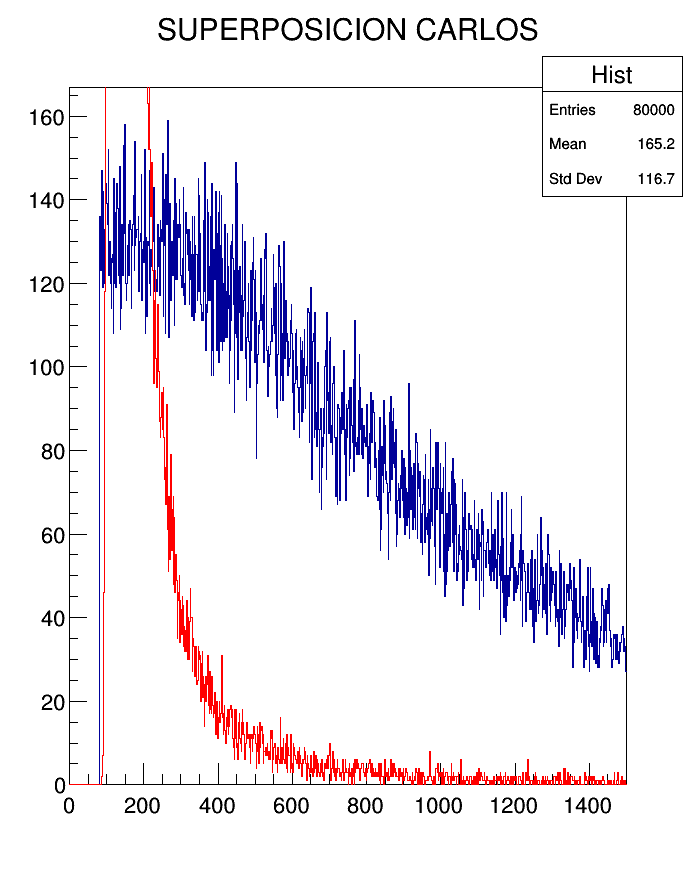

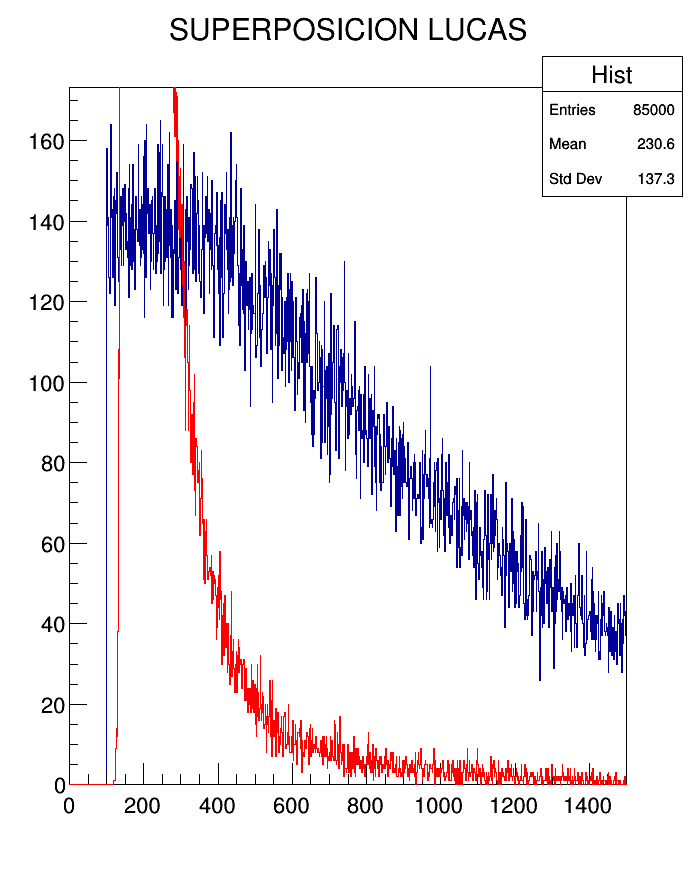

In [34]:
#Superposición de histogramas CARLOS
#Color rojo: Muestra generada
#Color azul: Datos

print(len(Cphi_l1))
print(len(Cphi_l2))

Cphi=Cphi_l1+Cphi_l2 
print(len(Cphi))
plt.hist(Cphi,bins=500)
plt.show()
HistC= ROOT.TH1F( 'HistC', 'SUPERPOSICION CARLOS', 1000, 0 , 1500 )
for i in Cphi:
  HistC.Fill(i)
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
HistC.Draw()
Histograma_C.Draw('same')
Histograma_C.SetLineColor(2)
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()




#Superposición de histogramas LUCAS
#Color rojo: Muestra generada
#Color azul: Datos

print(len(Lphi_l1))
print(len(Lphi_l2))

Lphi=Lphi_l1+Lphi_l2 
print(len(Lphi))
plt.hist(Lphi,bins=500)
plt.show()
HistL= ROOT.TH1F( 'HistL', 'SUPERPOSICION LUCAS', 1000, 0 , 1500 )
for i in Lphi:
  HistL.Fill(i)
c2 = ROOT.TCanvas( 'c2', 'The FillRandom example', 200, 10, 700, 900 )
c2.SetFillColor( 0 )
HistL.Draw()
Histograma_L.Draw('same')
Histograma_L.SetLineColor(2)
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()